In [1]:
from src.dataviz import DatabasePlots
import geopandas as gpd
import plotly.express as px

In [2]:
db_plots = DatabasePlots()

In [15]:
db_plots.df._iso_codes["sub-region"].unique()

array(['Southern Asia', 'Northern Europe', 'Southern Europe',
       'Northern Africa', 'Polynesia', 'Sub-Saharan Africa',
       'Latin America and the Caribbean', nan, 'Western Asia',
       'Australia and New Zealand', 'Western Europe', 'Eastern Europe',
       'Northern America', 'South-eastern Asia', 'Eastern Asia',
       'Melanesia', 'Micronesia', 'Central Asia'], dtype=object)

In [17]:
db_plots.df._iso_codes

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia
1,Aland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia
...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa


In [20]:
gdf = gpd.read_file("./../data/shapefiles/world/world.shp")
gdf["name"] = gdf.apply(lambda row: f"{row.region}-{row.subregion}", axis=1)
gdf = gdf.reset_index(names="color").set_index("name")

In [21]:
mapper = db_plots.df._iso_codes.set_index("alpha-3").to_dict()["region"]
gdf["global_region"] = gdf.region.map(mapper)
mapper = db_plots.df._iso_codes.set_index("alpha-3").to_dict()["sub-region"]
gdf["global_subregion"] = gdf.region.map(mapper)
gdf

,color,region,subregion,geometry,global_region,global_subregion
name,,,,,,
MNP-XX,0,MNP,XX,"MULTIPOLYGON (((145.63331 14.91236, 145.62412 ...",Oceania,Micronesia
FRA-XX,1,FRA,XX,"MULTIPOLYGON (((9.44750 42.68305, 9.45014 42.6...",Europe,Western Europe
SRB-XX,2,SRB,XX,"POLYGON ((20.26102 46.11485, 20.31403 46.06986...",Europe,Southern Europe
URY-XX,3,URY,XX,"POLYGON ((-53.37430 -33.74067, -53.39917 -33.7...",Americas,Latin America and the Caribbean
GUM-XX,4,GUM,XX,"POLYGON ((144.70941 13.23500, 144.70245 13.235...",Oceania,Micronesia
...,...,...,...,...,...,...
USA-PN,339,USA,PN,"MULTIPOLYGON (((-108.21528 31.33374, -109.0504...",Americas,Northern America
USA-TP,340,USA,TP,"MULTIPOLYGON (((-110.74251 31.73159, -111.0953...",Americas,Northern America
USA-TV,341,USA,TV,"POLYGON ((-81.90982 36.22948, -82.07902 36.106...",Americas,Northern America


In [4]:
gdf.head(5)

,color,region,subregion,geometry
name,,,,
MNP-XX,0,MNP,XX,"MULTIPOLYGON (((145.63331 14.91236, 145.62412 ..."
FRA-XX,1,FRA,XX,"MULTIPOLYGON (((9.44750 42.68305, 9.45014 42.6..."
SRB-XX,2,SRB,XX,"POLYGON ((20.26102 46.11485, 20.31403 46.06986..."
URY-XX,3,URY,XX,"POLYGON ((-53.37430 -33.74067, -53.39917 -33.7..."
GUM-XX,4,GUM,XX,"POLYGON ((144.70941 13.23500, 144.70245 13.235..."


<Axes: >

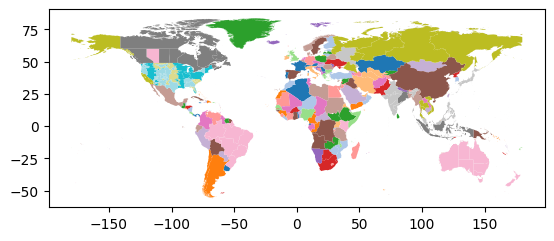

In [8]:
gdf.plot(
    column="color",
    cmap="tab20"
)

In [36]:
usa = gdf[gdf.region == "USA"].copy().reset_index(drop=True)

usa.head(5)

,color,region,subregion,geometry
name,,,,
USA-AK,0,USA,AK,"MULTIPOLYGON (((-139.06039 59.99977, -138.6931..."
USA-BA,1,USA,BA,"MULTIPOLYGON (((-123.03663 40.36388, -123.0042..."
USA-CI,2,USA,CI,"POLYGON ((-123.39303 41.16099, -123.42903 40.9..."
USA-II,3,USA,II,"POLYGON ((-114.75544 32.64156, -114.72415 32.7..."
USA-LD,4,USA,LD,"MULTIPOLYGON (((-118.65899 34.16872, -118.5437..."


In [ ]:
fig = px.choropleth(
    gdf,
    geojson=gdf.geometry, 
    locations=gdf.index,
    color="color",
    # projection="mercator"
    # locations="alpha-3",
    # color="Included", 
    # hover_name="name",
    # color_discrete_map=colours,
    # hover_data=['region','subregion'],
)

fig.write_html('t.html')
fig.show()

In [20]:
df = px.data.election()
geo_df = gpd.GeoDataFrame.from_features(
    px.data.election_geojson()["features"]
).merge(df, on="district").set_index("district")

In [21]:
geo_df.head(5)

,geometry,Coderre,Bergeron,Joly,total,winner,result,district_id
district,,,,,,,,
11-Sault-au-Récollet,"MULTIPOLYGON (((-73.63632 45.57592, -73.63628 ...",3348,2770,2532,8650,Coderre,plurality,11
12-Saint-Sulpice,"POLYGON ((-73.62175 45.55448, -73.62350 45.553...",3252,2521,2543,8316,Coderre,plurality,12
13-Ahuntsic,"POLYGON ((-73.65132 45.55457, -73.65687 45.545...",2979,3430,2873,9282,Bergeron,plurality,13
14-Bordeaux-Cartierville,"POLYGON ((-73.70430 45.54419, -73.70421 45.543...",3612,1554,2081,7247,Coderre,plurality,14
21-Ouest,"POLYGON ((-73.55769 45.59322, -73.56942 45.597...",2184,691,1076,3951,Coderre,majority,21


In [22]:
fig = px.choropleth(geo_df,
                   geojson=geo_df.geometry,
                   locations=geo_df.index,
                   color="Joly",
                   projection="mercator")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()